In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn as sk

# 알고리즘을 그래픽화 하기위한 라이브러리
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import rcParams
import re
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Rescaling
import keras

# 모델생성 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 스플릿,스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv
/kaggle/input/playground-series-s3e5/sample_submission.csv
/kaggle/input/playground-series-s3e5/train.csv
/kaggle/input/playground-series-s3e5/test.csv


In [2]:
# 1 데이터 불러오기 
path = "/kaggle/input/playground-series-s3e5/"
path2 = "/kaggle/input/red-wine-quality-cortez-et-al-2009/"
train_csv = pd.read_csv(path+"train.csv")
train2_csv = pd.read_csv(path2+"winequality-red.csv")

test_csv = pd.read_csv(path+"test.csv")

In [3]:
print(train_csv.shape)
train_csv.head()

(2056, 13)


,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [4]:
print(train2_csv.shape)
train2_csv.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# 널값 확인
train_csv.isna().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
train2_csv.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# 문자열 확인
train_csv.dtypes

Id                        int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
train2_csv.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [9]:
# ID 값을 제거한뒤
test_csv = test_csv.drop("Id",axis=1)
train_csv = train_csv.drop("Id",axis=1)

In [10]:
# concat 병합 진행
train = pd.concat([train_csv,train2_csv])


In [11]:
print(train.shape)
train["quality"].unique()

(3655, 12)


array([6, 7, 5, 4, 8, 3])

In [12]:
train = pd.get_dummies(train)

In [13]:
train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [14]:
# DEA 진행
# import pandas_profiling
# train.profile_report()

In [15]:
x = train.drop("quality",axis = 1)
y = train["quality"]

In [16]:
# 7. train test 스플릿

x_train, x_test, y_train,y_test = train_test_split(
    x,
    y,
    train_size=0.8,
    shuffle = True,
    stratify = y,
    # random_state=21
)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

print(y_train[:6])



(2924, 11) (731, 11)
(2924,) (731,)
278     6
1589    5
64      5
1760    7
1244    5
1816    6
Name: quality, dtype: int64


In [17]:
# 1-1 겟더미로 y 값 원 핫 인덱싱
y_train = pd.get_dummies(y_train)


In [18]:
y_test = pd.get_dummies(y_test)

In [19]:
y_train.shape

(2924, 6)

In [20]:
# 9. https://www.kaggle.com/code/alexandershumilin/ps-s3-e3-keras-nn 
# 윗 링크의 모델 따옴
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow_addons as tfa
dr = 0.2

def get_model():
    model = keras.Sequential([
    layers.Dense(512), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(256), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(128), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(64), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.BatchNormalization(),
    layers.Dense(32), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(16), 
    layers.LeakyReLU(alpha=0.3),
    layers.Dropout(rate=dr),
    layers.Dense(8),
    layers.LeakyReLU(alpha=0.3),
    layers.Dense(6, activation='softmax')
   ])

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(
        optimizer = "adam",
        loss="categorical_crossentropy",
        metrics='AUC',
)
    return model

early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_auc", 
        mode='max',
        patience=30,
        min_delta=0.00001,
        restore_best_weights=True,
)
plat = keras.callbacks.ReduceLROnPlateau(
        monitor="val_auc", 
        mode='max', 
        patience=3, 
        factor=0.1, 
        min_lr=1e-8, 
        min_delta=0.000001)


In [21]:
model = get_model()

class_weight = 10
history = model.fit(
        x_train, y_train,
        validation_split=0.2,
        batch_size=32,
        epochs=500,
        callbacks=[early_stopping, plat],
        verbose=1
        )


2023-02-02 01:29:41.747425: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-02 01:29:41.909276: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
74/74 [==============================] - 3s 14ms/step - loss: 1.5044 - auc: 0.7614 - val_loss: 1.3393 - val_auc: 0.8326
Epoch 2/500
74/74 [==============================] - 1s 8ms/step - loss: 1.3131 - auc: 0.8278 - val_loss: 1.2162 - val_auc: 0.8460
Epoch 3/500
74/74 [==============================] - 1s 8ms/step - loss: 1.2891 - auc: 0.8295 - val_loss: 1.2124 - val_auc: 0.8474
Epoch 4/500
74/74 [==============================] - 1s 8ms/step - loss: 1.2448 - auc: 0.8372 - val_loss: 1.1913 - val_auc: 0.8526
Epoch 5/500
74/74 [==============================] - 1s 8ms/step - loss: 1.2283 - auc: 0.8383 - val_loss: 1.1811 - val_auc: 0.8552
Epoch 6/500
74/74 [==============================] - 1s 8ms/step - loss: 1.2142 - auc: 0.8463 - val_loss: 1.2383 - val_auc: 0.8274
Epoch 7/500
74/74 [==============================] - 1s 8ms/step - loss: 1.2013 - auc: 0.8468 - val_loss: 1.1458 - val_auc: 0.8656
Epoch 8/500
74/74 [==============================] - 1s 8ms/step - loss: 1.2017 - 

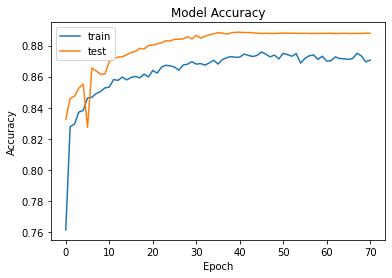

In [22]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['auc', 'val_auc'], loc='upper left')
plt.show()

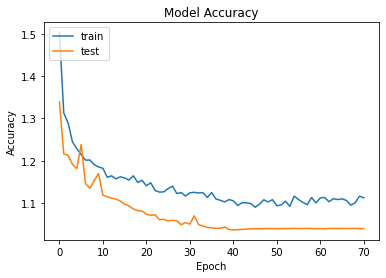

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def RMSE(y_test,y_predict):
    return np.sqrt(mean_squared_error(y_test,y_predict))
# 평가 손실률 가져오기


loss = model.evaluate(x_test,y_test)

y_predict =model.predict(x_test)
# print("=================")
# print(y_test)
# print(y_predict)
print("================================")
print("loss : ",loss[0],"\n acc : ",loss[1])
print("RMSE : ",RMSE(y_test,y_predict))
print("R2   : ",r2_score(y_test,y_predict))

23/23 [==============================] - 0s 4ms/step - loss: 1.0471 - auc: 0.8857
loss :  1.047080397605896 
 acc :  0.8857277631759644
RMSE :  0.30631843
R2   :  0.07447619124035187


In [25]:
preds =[]

# 기존 원핫 인코딩 범위는 0~ 5까지 지만
# 위 데이터의 quailty 범위는 3~8 까지라 3을 더해줌
preds.append(np.argmax(model.predict(test_csv),axis=1)+3)
pred = (np.average(np.array(preds),axis=0))

pred= pred.astype(int)

print(pred[:50])

# 15-3 경로와 파일명 지정
submission = pd.read_csv(path +"sample_submission.csv",index_col="Id")
submission['quality'] = pred
# 임계값을 0 으로 변경
# submission['quality'] = np.where(submission['quality'] > 0.5, 1 , 0)

submission.to_csv("/kaggle/working/"+"submission_4.csv")

[5 5 5 6 6 5 5 5 6 5 5 5 6 6 5 5 6 5 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 6 5 6
 5 5 5 5 5 6 6 6 5 5 5 5 5]
